# MNIST For ML Beginners

This follows the tensorflow tutorial https://www.tensorflow.org/versions/r0.10/tutorials/mnist/beginners/index.html
with some minor changes/additions.

## Introduction

Rather than 'Hello World' in Machine Learning the basic introduction is conducted using the MNIST dataset. This is a collection of handwritten digits (http://yann.lecun.com/exdb/mnist/). In this tutorial we are going use a basic softmax regression model in order to classify the digits. Before we begin make sure you have the TensorFlow library installed. Support code to easily read/convert the data is provided, the focus is on the classification task, not how to read binary data. The data is already split up into training and test data so no need to implement any sort of cross-validation (although you still could if you are so inclined).

The data has three main parts: 55,000 data points of training data, 10,000 data points of testing data, and 5,000 points of validation data. All of the data points are 28x28 pixel images with a label.

Let's read in the data using Tensorflows built in classes (thanks Google!).

In [22]:
# bug, possibly in tensorflow or maybe just me.
# if numpy is not explicitly importet python dies a horrible death
import numpy as np
from tensorflow.examples.tutorials.mnist import input_data
mnist = input_data.read_data_sets("MNIST_data/", one_hot=True)

Extracting MNIST_data/train-images-idx3-ubyte.gz
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz


[ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  0.  0.  0.]
[ 0.  0.  0.  1.  0.  0.  0.  0.  0.  0.]


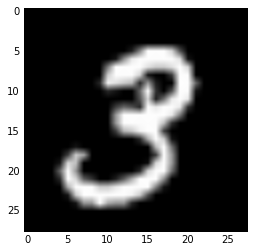

In [31]:
from matplotlib import pyplot as plt
print(mnist.train.images[1][1:100])
print(mnist.train.labels[1])

# Need to reshape the data, right now just in a (784,) array
plt.imshow(mnist.train.images[1].reshape((28,28)), cmap='gray')
plt.show()

## What is Softmax?

We know that all of our data is in the label space {0...9}. We want to be able to take in a naive (not yet classified) image and assign probabilities to the possible labels. We will end up with a vector that looks like:

$\left[ \begin{array}{c}
0.1 \\
0.1 \\
0.1 \\
0.1 \\
0.1 \\
0.1 \\
0.1 \\
0.1 \\
0.1 \\
0.1 \\
\end{array} \right]$